In [12]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline


In [13]:
data= pd.read_csv('data/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Simple linear regression

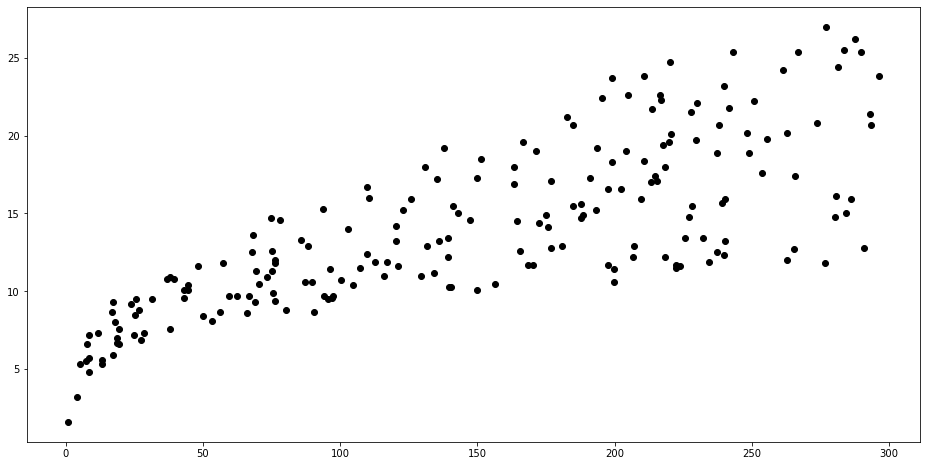

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(data['TV'],data['sales'],c='black')
#plt.xlabel('Money spent on TV ads (S)')
#plt.ylabel('Sales (k$)')
plt.show()

In [20]:
X=data['TV'].values.reshape(-1,1)
y=data['sales'].values.reshape(-1,1)

reg=LinearRegression()
reg.fit(X,y)
print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear model is: 
 Y = 7.0325935491276965 + 0.047536640433019736*TV


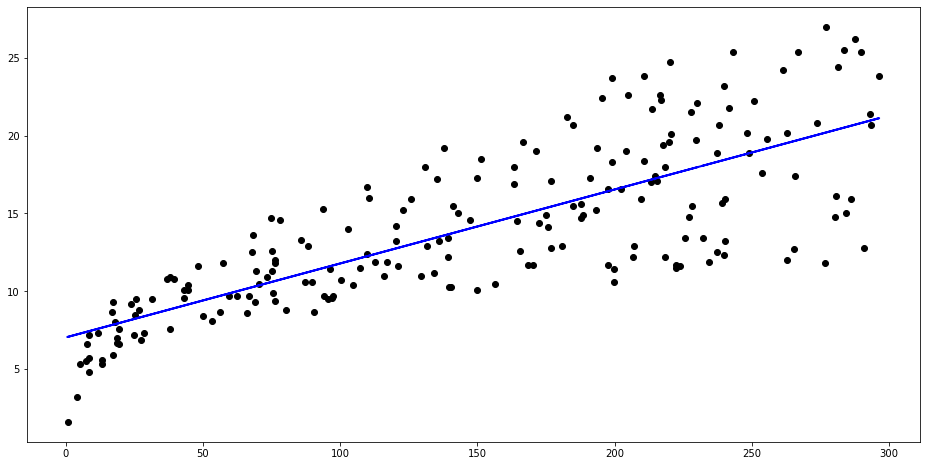

In [27]:
predictions=reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(X,y,c='black')
plt.plot(X,predictions,c='blue',linewidth=2)
plt.show()

In [29]:
X= data['TV']
y=data['sales']

exog=sm.add_constant(X)
est= sm.OLS(y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        16:05:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

# Multiple Linear Regression

In [33]:
Xs= data.drop(['sales'],axis=1)
y= data['sales'].values.reshape(-1,1)

reg=LinearRegression()
reg.fit(Xs,y)
print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

The linear model is: 
 Y = 2.9388893694594085 + 0.04576464545539759*TV + 0.1885300169182046*radio + -0.0010374930424762452*newspaper


In [34]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y= data['sales'].values.reshape(-1,1)

exog=sm.add_constant(X)
est= sm.OLS(y,exog).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        16:10:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0